In [55]:
import torch
from torch import nn


In [56]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [57]:
#importing the data
import requests
import zipfile
from pathlib import Path

data_path=Path('data/')
image_path=data_path/'pizza_steak_sushi'

if image_path.is_dir():
  print(f'{image_path} directory exists. ')

else:
  print(f'didnot find {image_path} directory, so creating one...')
  image_path.mkdir(parents=True, exist_ok=True)

  #downloading pizza,steak and sushi data

  with open(data_path/'pizza_steak_sushi.zip','wb') as f:
    request=requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('downloading file')
    f.write(request.content)

  with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip_ref:
    print('unzipping data')
    zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists. 


# Becoming one with the data

In [58]:
import os
def walk_through_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

walk_through_dir(image_path)

there are 2 directories and 0 images in data/pizza_steak_sushi
there are 3 directories and 0 images in data/pizza_steak_sushi/train
there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
there are 3 directories and 0 images in data/pizza_steak_sushi/test
there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak


In [59]:
#setting up train and test path
train_dir=image_path/'train'
test_dir=image_path/'test'
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

random image path: data/pizza_steak_sushi/train/pizza/2154394.jpg
random image class: pizza
random image height: 512
random image weidth: 512


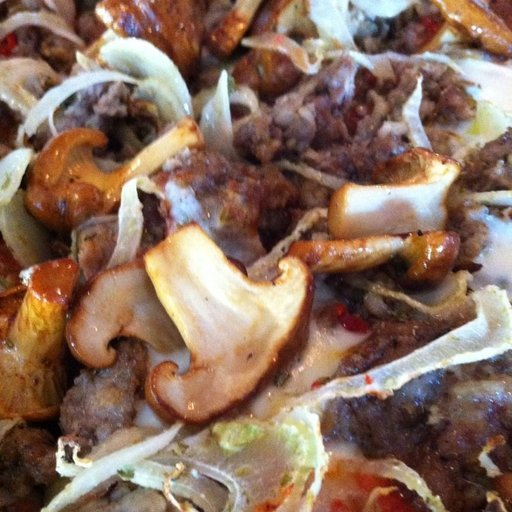

In [60]:
#visualizing images
import random
from PIL import Image

random.seed(42)
image_path_list=list(image_path.glob('*/*/*.jpg'))

#get random image path
random_image_path=random.choice(image_path_list)

#get image class from path name
image_class=random_image_path.parent.stem

img=Image.open(random_image_path)

print(f'random image path: {random_image_path}')

print(f'random image class: {image_class}')

print(f'random image height: {img.height}')

print(f'random image weidth: {img.width}')
img


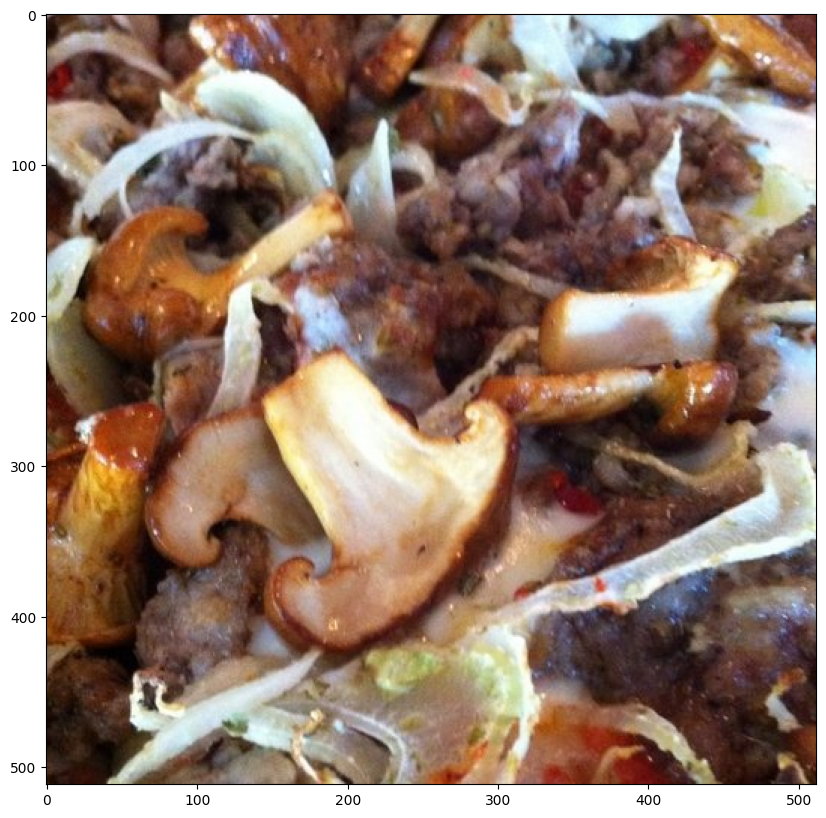

In [61]:
#we can do same using plt but first we need t convert it to numpy array
import numpy as np
import matplotlib.pyplot as plt
#turn image to array
img_as_array=np.asarray(img)
plt.figure(figsize=(10,10))
plt.imshow(img_as_array)


In [62]:
#transforming data
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [63]:
#write transform for image
data_transform=transforms.Compose([transforms.Resize(size=(64,64)),
                                   transforms.RandomHorizontalFlip(p=0.5),
                                   transforms.ToTensor()
                                   ])

In [64]:
data_transform(img),data_transform(img).shape

(tensor([[[0.2353, 0.3020, 0.3922,  ..., 0.4275, 0.4235, 0.4196],
          [0.1843, 0.4353, 0.5529,  ..., 0.5412, 0.4196, 0.4039],
          [0.4078, 0.6471, 0.7020,  ..., 0.6706, 0.5686, 0.4471],
          ...,
          [0.1765, 0.1686, 0.2196,  ..., 0.4039, 0.3294, 0.3765],
          [0.2392, 0.2000, 0.1765,  ..., 0.4941, 0.4431, 0.3490],
          [0.1686, 0.1765, 0.1804,  ..., 0.2510, 0.4431, 0.3529]],
 
         [[0.1490, 0.1922, 0.2863,  ..., 0.2549, 0.2078, 0.2118],
          [0.1020, 0.3373, 0.4745,  ..., 0.3569, 0.2157, 0.1882],
          [0.3294, 0.5804, 0.6549,  ..., 0.4353, 0.3608, 0.2275],
          ...,
          [0.1137, 0.1059, 0.1412,  ..., 0.2902, 0.1725, 0.1765],
          [0.1608, 0.1216, 0.0902,  ..., 0.3765, 0.3020, 0.1843],
          [0.0902, 0.0863, 0.0667,  ..., 0.1608, 0.3216, 0.2314]],
 
         [[0.1216, 0.1216, 0.2118,  ..., 0.2431, 0.1961, 0.1961],
          [0.0706, 0.2863, 0.4196,  ..., 0.3294, 0.1804, 0.1686],
          [0.2745, 0.5490, 0.6549,  ...,

In [65]:
def plot_transformed_images(image_paths,transform, n=3,seed=42):
  random.sedd(42)
  random_image_path=random.sample(image_paths,k=n)

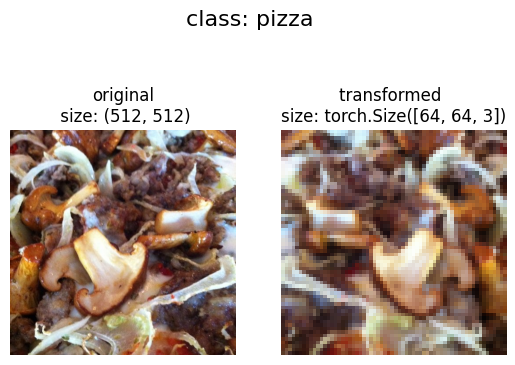

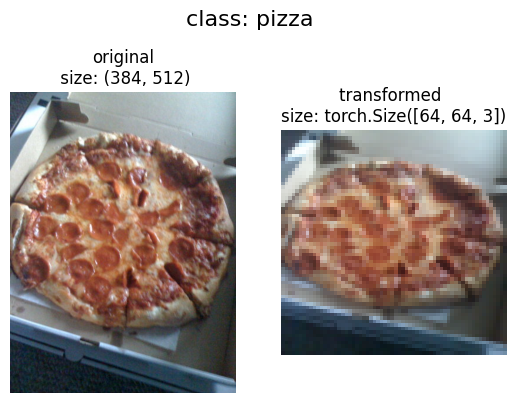

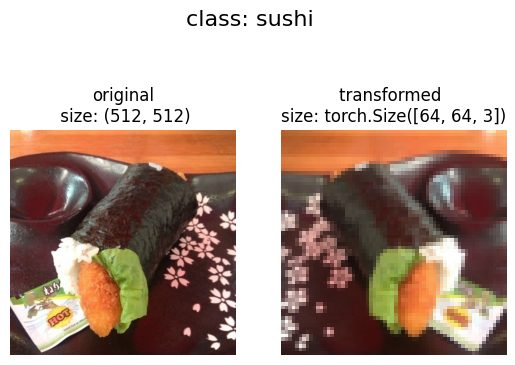

In [66]:
def plot_transformed_image(image_path, transform , n=3, seed =42):

  random.seed(42)
  random_image_path=random.sample(image_path,k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig, ax=plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f'original\n size: {f.size}')
      ax[0].axis('off')

    #transforming and plotting the transformed image

      img_transformed=transform(f).permute(1,2,0)
      # fig,ax=plt.subplots(2,2)
      ax[1].imshow(img_transformed)
      ax[1].set_title(f'transformed \nsize: {img_transformed.shape}')
      ax[1].axis('off')

      fig.suptitle(f'class: {image_path.parent.stem}', fontsize=16)


plot_transformed_image(image_path_list,transform=data_transform)


In [67]:
#loading image data using imagefolder
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform)
test_data=datasets.ImageFolder(root=test_dir,
                                transform=data_transform)

print(f'train data: {train_data} \n test data : {test_data}')

train data: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ) 
 test data : Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [68]:
#getting a class name:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [69]:
#we can also get class names as a dict
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [70]:
len(train_data),len(test_data)

(225, 75)

In [74]:
img,label=train_data[0][0],train_data[0][1]
img,label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [76]:
img,label=train_data[0][0],train_data[0][1]
print(f'image tensor: {img}')
print(f'image shape: {img.shape}')
print(f'image datatype: {img.dtype}')
print(f'image label: {label}')
print(f'label datatype: {type(label)}')

image tensor: tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

befoe permute ie original shape: torch.Size([3, 64, 64])
after permute ie permute shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

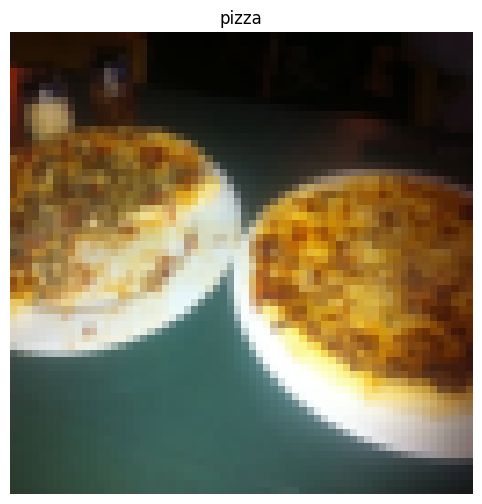

In [78]:
#rearange the order of dimension
img_permute=img.permute(1,2,0)

print(f'befoe permute ie original shape: {img.shape}')
print(f'after permute ie permute shape: {img_permute.shape}')
plt.figure(figsize=(12,6))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label])

In [83]:
#turn loaded images into dataloaders
from torch.utils.data import DataLoader
train_dataloader= DataLoader(train_data, batch_size=1,num_workers=1, shuffle=True)
test_dataloader= DataLoader(test_data, batch_size=1,num_workers=1, shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bb256cbcb20>,
 <torch.utils.data.dataloader.DataLoader at 0x7bb256cbd6c0>)

In [85]:
#checking the shape
img,label=next(iter(train_dataloader))
img.shape,label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [87]:
#model 0 tinyvgg without data augumentation

#creatin transforms and loading data for model 0
data_transforms=transforms.Compose([
    transforms.Resize(size=(64,64), antialias=True),
    transforms.ToTensor(),])

In [90]:
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,transform=data_transforms)

test_data=datasets.ImageFolder(root=test_dir,transform=data_transforms)

#loading the data using dataloader
from torch.utils.data import DataLoader
BatchSize=32
NUM_WORKERS=os.cpu_count()

train_dataloader=DataLoader(train_data, batch_size=BatchSize,num_workers=NUM_WORKERS,shuffle=True)

test_dataloader=DataLoader(test_data, batch_size=BatchSize,num_workers=NUM_WORKERS,shuffle=False)

In [98]:
#creaing a tiny vff model class
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int , output_shape: int):
    super().__init__()
    self.conv_block_1=nn.Sequential(nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,kernel_size=3, stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3, stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.conv_block_2=nn.Sequential(nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3, stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units, out_channels=output_shape,kernel_size=3, stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.classifier=nn.Sequential(nn.Flatten(),
                                  nn.Linear(in_features=hidden_units*16*16,out_features=output_shape))

  def forward(self,x):
    x=self.conv_block_1(x)
    x=self.conv_block_2(x)
    x=self.classifier(x)

    return x


torch.manual_seed(42)
model_0=TinyVGG(3,10,len(train_data.classes)).to(device)

model_0



TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [99]:
#Try a forward pass on a single image (to test the model)


In [100]:
# Use torchinfo to get an idea of the shapes going through our model

In [101]:
#creating traina and test loop functions